Mounted at /content/gdrive


# Setup

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!git clone https://github.com/jadrouil/fp-dataset-artifacts.git

Cloning into 'fp-dataset-artifacts'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 73 (delta 26), reused 41 (delta 21), pack-reused 25
Receiving objects: 100% (73/73), 26.21 KiB | 1.87 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [ ]:
!pip install --upgrade pip



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
%cd fp-dataset-artifacts/

/content/fp-dataset-artifacts


In [ ]:
!pwd

/content/fp-dataset-artifacts


In [ ]:
!python --version

Python 3.10.12


In [ ]:
!export PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:512

In [3]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


# Training

In [ ]:
!python3 run.py --do_train --task qa --dataset squad --output_dir ../gdrive/MyDrive/NLP_Final/default/ --per_device_train_batch_size 64 --num_train_epochs 10

2023-11-27 03:28:14.517065: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 03:28:14.517111: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 03:28:14.517143: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 03:28:15.978956: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Extracting data files: 100% 2/2 [00:00<00:00, 1867.46it/s]
Generating train split: 100% 87599/87599 [00:07<00:00, 11038.84 examples/s]
Generating validation split: 100% 10570/10570 [00:01<00:00, 8849.20 examples/s]
config.json: 100% 665/6

# Eval

In [ ]:
!python3 run.py --do_eval --task qa --dataset squad --output_dir ../gdrive/MyDrive/NLP_Final/default --per_device_train_batch_size 64 --model ../gdrive/MyDrive/NLP_Final/default

2023-11-26 01:36:23.028834: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 01:36:23.028912: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 01:36:23.028947: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-26 01:36:24.258179: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Extracting data files: 100% 2/2 [00:00<00:00, 2118.34it/s]
Generating train split:   0% 0/87599 [00:00<?, ? examples/s]Exception ignored in: <function _xla_gc_callback at 0x7f16040f3760>
Traceback (most recent call last):
  File "/usr/loc

# [out of date] Result Inspection

In [ ]:
import json
import os

In [ ]:
f = open('../gdrive/MyDrive/NLP_Final/eval_predictions.jsonl', encoding="utf-8", mode="r")


data = [json.loads(s) for s in f.readlines()]


f.close()

In [ ]:
similarity_pairs = []

from difflib import SequenceMatcher

def similar(a_s, b):
    possible = [SequenceMatcher(None, a, b).ratio() for a in a_s]
    possible += [SequenceMatcher(None, b, a).ratio() for a in a_s]
    return max(possible)

for row in data:
  similarity_pairs.append((similar(row["answers"]["text"], row["predicted_answer"]), row))



In [ ]:
similarity_pairs.sort(key=lambda x: x[0])

In [ ]:
similarity_pairs[2]

(0.0,
 {'id': '56beb6f23aeaaa14008c92a4',
  'title': 'Super_Bowl_50',
  'context': 'The Panthers beat the Seattle Seahawks in the divisional round, running up a 31–0 halftime lead and then holding off a furious second half comeback attempt to win 31–24, avenging their elimination from a year earlier. The Panthers then blew out the Arizona Cardinals in the NFC Championship Game, 49–15, racking up 487 yards and forcing seven turnovers.',
  'question': 'How many times did Arizona turn the ball over in the NFC Championship?',
  'answers': {'text': ['seven', 'seven', 'seven'],
   'answer_start': [337, 337, 337]},
  'predicted_answer': '49–15'})

In [ ]:
sims = [p[0] for p in similarity_pairs]



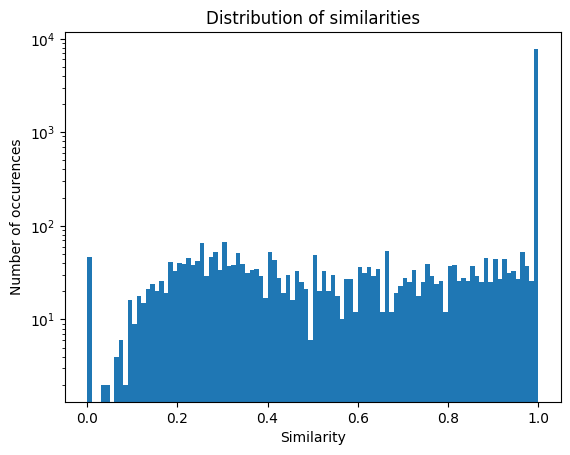

In [ ]:
# prompt: graph the distribution of numbers in sims on a log scale

import matplotlib.pyplot as plt
plt.hist(sims, bins=100, log=True)
plt.xlabel("Similarity")
plt.ylabel("Number of occurences")
plt.title("Distribution of similarities")
plt.show()


In [ ]:
# prompt: write a function that returns the slice of similarity_pairs where the first element is below some threshold

def filter_by_similarity(similarity_pairs, threshold):
    return [p for p in similarity_pairs if p[0] < threshold]


In [ ]:
off = filter_by_similarity(similarity_pairs, 0.25)

print(len(off), "off", len(similarity_pairs) )

509 off 10570


In [ ]:
off[-20]

(0.24242424242424243,
 {'id': '57284142ff5b5019007da00a',
  'title': 'University_of_Chicago',
  'context': "The University of Chicago was created and incorporated as a coeducational, secular institution in 1890 by the American Baptist Education Society and a donation from oil magnate and philanthropist John D. Rockefeller on land donated by Marshall Field. While the Rockefeller donation provided money for academic operations and long-term endowment, it was stipulated that such money could not be used for buildings. The original physical campus was financed by donations from wealthy Chicagoans like Silas B. Cobb who provided the funds for the campus' first building, Cobb Lecture Hall, and matched Marshall Field's pledge of $100,000. Other early benefactors included businessmen Charles L. Hutchinson (trustee, treasurer and donor of Hutchinson Commons), Martin A. Ryerson (president of the board of trustees and donor of the Ryerson Physical Laboratory) Adolphus Clay Bartlett and Leon Mande

In [ ]:
similarity_pairs[-9000]

(0.5714285714285714,
 {'id': '56e10ddce3433e1400422b4b',
  'title': 'Nikola_Tesla',
  'context': "In the fall of 1937, after midnight one night, Tesla left the Hotel New Yorker to make his regular commute to the cathedral and the library to feed the pigeons. While crossing a street a couple of blocks from the hotel, Tesla was unable to dodge a moving taxicab and was thrown heavily to the ground. Tesla's back was severely wrenched and three of his ribs were broken in the accident (the full extent of his injuries will never be known; Tesla refused to consult a doctor—an almost lifelong custom). Tesla didn't raise any question as to who was at fault and refused medical aid, only asking to be taken to his hotel via cab. Tesla was bedridden for some months and was unable to continue feeding pigeons from his window; soon, they failed to come. In early 1938, Tesla was able to get up. He at once resumed the pigeon-feeding walks on a much more limited scale, but frequently had a messenger act f

In [ ]:
# prompt: count the number of times the phrase "how many" (case insensitive) occurs in the question for each object in off

count_how_many = [0]*len(off)
for i, p in enumerate(off):
    if "how many" in p[1]["question"].lower():
        count_how_many[i] += 1


In [ ]:
sum(count_how_many)

22

In [ ]:


# # prompt: Write a loop that prints each pair in off and prompts for an input type. The options for type should be a type I previously specified or a new one.
# import pprint
# from IPython.display import clear_output

# import re

# def is_number(string):
#   return re.match(r'^[0-9]+$', string)



# options = []
# for i, p in enumerate(off):
#   clear_output(wait=True)
#   text = p[1]
#   print(i, "of ", len(off))
#   print(text['question'])
#   pprint.pprint(text['context'])
#   print("gold label:", text['answers']['text'])
#   print("predicted:", text['predicted_answer'])
#   opt_strs = "\n".join([f"{j}: {s}" for j, s in enumerate(options)])
#   print(f"Options:\n{opt_strs}")
#   answer = input("What is the type of this pair? ")
#   if is_number(answer):
#     answer = int(answer)
#   else:
#     options.append(answer)
#     answer = len(options)-1
#   off[i][1]["type"] = options[answer]

# # prompt: write a function that writes the off list out to a jsonl file

# with open('../gdrive/MyDrive/NLP_Final/off.jsonl', 'w', encoding="utf-8") as f:
#   for p in off:
#     f.write(json.dumps(p[1]) + '\n')


In [ ]:
f = open('../gdrive/MyDrive/NLP_Final/off.jsonl', encoding="utf-8", mode="r")


reread = [json.loads(s) for s in f.readlines()]

f.close()

print(reread[100])

{'id': '5726b9e15951b619008f7bf5', 'title': 'Genghis_Khan', 'context': 'As a result, by 1206 Temüjin had managed to unite or subdue the Merkits, Naimans, Mongols, Keraites, Tatars, Uyghurs, and other disparate smaller tribes under his rule. It was a monumental feat for the "Mongols" (as they became known collectively). At a Khuruldai, a council of Mongol chiefs, Temüjin was acknowledged as "Khan" of the consolidated tribes and took the new title "Genghis Khan". The title Khagan was not conferred on Genghis until after his death, when his son and successor, Ögedei, took the title for himself and extended it posthumously to his father (as he was also to be posthumously declared the founder of the Yuan dynasty). This unification of all confederations by Genghis Khan established peace between previously warring tribes and a single political and military force under Genghis Khan.', 'question': 'Who made Temüjin khan of the Mongols?', 'answers': {'text': ['a council of Mongol chiefs', 'a cou

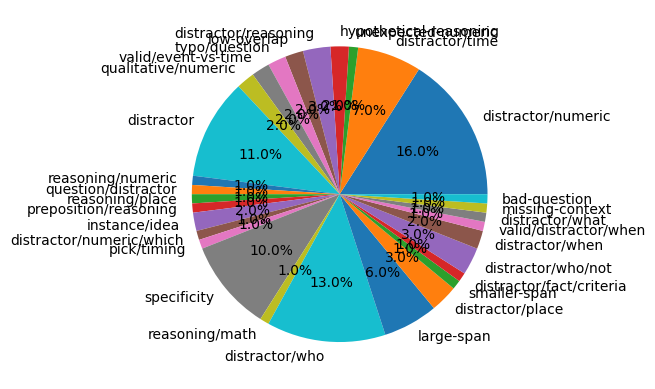

In [ ]:
# prompt: create a pie chart based on the 'type' field of the first 100 elements in reread

import matplotlib.pyplot as plt
from collections import defaultdict

labels = [r['type'] for r in reread[:100]]

def pie_chart_labels(labels, threshold=0):
  counts_by_type = defaultdict(lambda: 0)
  for l in labels:
    counts_by_type[l] += 1

  wedge_sizes = []
  key = []
  for k, v in counts_by_type.items():
    if v < threshold:
      continue
    wedge_sizes.append(v)
    key.append(k)


  plt.pie(wedge_sizes, autopct='%1.1f%%', labels=key)
  plt.show()

pie_chart_labels(labels)

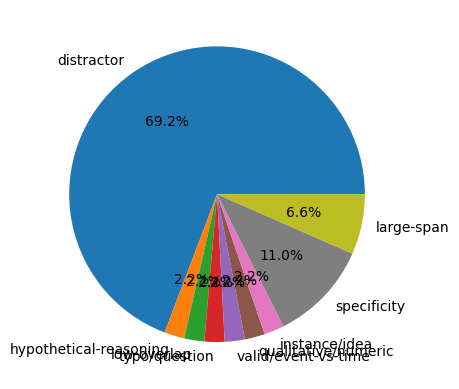

In [ ]:
import re

mergers = {
    "distractor":  re.compile(".*distractor.*")
}


def pie_chart_merged(labels, threshold=0):
  merged = [l for l in labels]
  for i in range(0, len(merged)):
    lbl = merged[i]
    for k, v in mergers.items():
      if v.match(lbl):
        merged[i] = k

  pie_chart_labels(merged, threshold=threshold)

pie_chart_merged(labels, threshold=2)


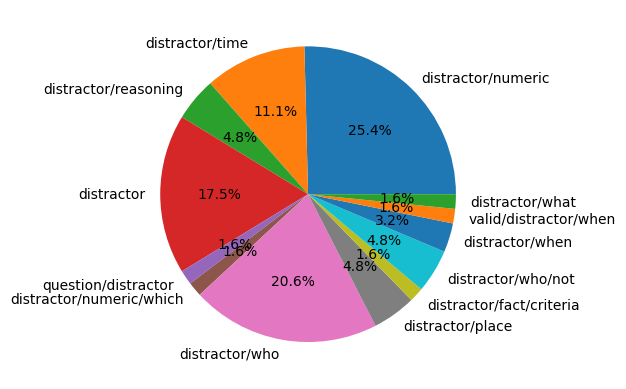

In [ ]:

def pie_chart_filtered(labels, filter, threshold=0):
  merged = [l for l in labels if filter.match(l)]
  pie_chart_labels(merged, threshold=threshold)

pie_chart_filtered(labels, filter=re.compile(".*distractor.*"))

In [ ]:
import pprint

def print_qa(qa):
  print(qa['question'])
  pprint.pprint(qa['context'])
  print(qa['answers']['text'])
  print("Pred:", qa['predicted_answer'])

print_qa(reread[0])

How many teams up to Super Bowl 50 have been to the championship game eight times?
('For the third straight season, the number one seeds from both conferences '
 'met in the Super Bowl. The Carolina Panthers became one of only ten teams to '
 'have completed a regular season with only one loss, and one of only six '
 'teams to have acquired a 15–1 record, while the Denver Broncos became one of '
 'four teams to have made eight appearances in the Super Bowl. The Broncos '
 'made their second Super Bowl appearance in three years, having reached Super '
 'Bowl XLVIII, while the Panthers made their second Super Bowl appearance in '
 'franchise history, their other appearance being Super Bowl XXXVIII. '
 'Coincidentally, both teams were coached by John Fox in their last Super Bowl '
 'appearance prior to Super Bowl 50.')
['four', 'four', 'four']
Pred: six


## Error Reproduction



In [ ]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer
import datasets

MODEL_DIR = "../gdrive/MyDrive/NLP_Final/"


model = AutoModelForQuestionAnswering.from_pretrained(MODEL_DIR, )
tokenizer = AutoTokenizer.from_pretrained(MODEL_DIR, use_fast=True)
data = datasets.load_dataset('squad')

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

KeyboardInterrupt: ignored

## Distractibility

The model chooses spans from answers that slightly "match" the question. For example, the model if asked "how many X?" the model produces an answer that is plausible (i.e. a number), but it may not answer the question "how many x?"

## Questions
- Why does the model produce these specious answers?
 - Hypothesis: the model is giving to much weight to questioning word (e.g. how, when) and not focusing on the meaningful part of the *question*. More research [here](https://aclanthology.org/P18-1176.pdf).
  - Falsify: change subjects to show it's not relevant to the answer.
  - Improve: Teach the model to care about the meaning of the sentence.
    -






In [ ]:
!pwd

/content/fp-dataset-artifacts/fp-dataset-artifacts


In [ ]:
!ls ../gdrive/MyDrive/NLP_Final/

checkpoint-4000    eval_predictions.jsonl  runs			    tokenizer.json
config.json	   model.safetensors	   special_tokens_map.json  training_args.bin
eval_metrics.json  off.jsonl		   tokenizer_config.json    vocab.txt


# Dataset Cartography

In [27]:
import json
import os
# PATH = "../gdrive/MyDrive/NLP_Final/default/"
PATH = ""
f = open(os.path.join(PATH, 'cartography.json'), encoding="utf-8", mode="r")


losses = json.loads(f.read())
losses = [l["losses"] for l in losses]

f.close()

In [28]:
import numpy as np
losses = np.array(losses)

probs = np.exp(-1 * losses)

# mask = losses == losses.max(1, keepdims = 1)
# print(mask.shape)

# losses[mask] = 0
# print(losses.shape)




print(probs[0])

print(losses.shape)

[0.00163879 0.77484307 0.71365918 0.74825002 0.87011116 0.96832221
 0.9941765  0.97785456 0.99479869 0.99051924]
(87714, 10)


In [29]:


variance = np.var(probs, axis=1)
assert variance.shape[0] == losses.shape[0], variance.shape
assert len(variance.shape) == 1, variance.shape

last = losses[:, -1]
assert last.shape[0] == losses.shape[0], last.shape
assert len(last.shape) == 1, last.shape

means = np.mean(probs, axis=1)
assert means.shape[0] == losses.shape[0], means.shape
assert len(means.shape) == 1, means.shape




In [ ]:

print("var", np.percentile(variance, [33, 66, 99.9]))
print("mean", np.percentile(means, [33, 66, 99.9]))

filter = variance > 0.03979951 #np.logical_and(np.logical_and(variance > .07, means > .4), means < .6)
print(filter.shape)
a = variance[filter]



hard_filter = means < 0.50752288
easy_filter = means > 0.78919012


filter = hard_filter

not_filter = np.logical_not(filter)
b = variance[not_filter]

print(a.shape, variance.shape, b.shape)





var [0.01373322 0.03979951 0.16152299]
mean [0.50752288 0.78919012 0.99443726]
(87714,)
(29823,) (87714,) (58768,)


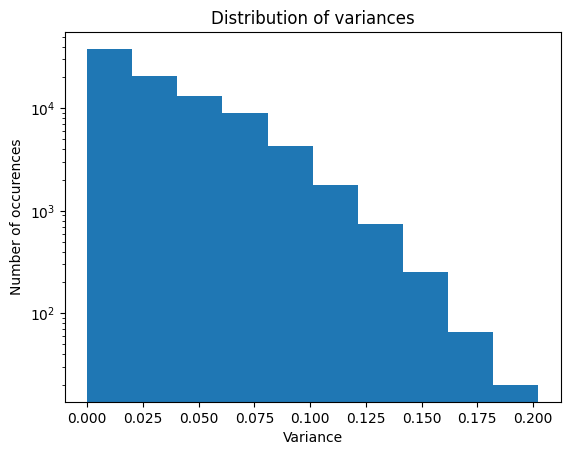

In [ ]:
from matplotlib import pyplot as plt
# prompt: create a bar charts to visualize the density of values

plt.hist(variance, bins=10, log=True)
plt.xlabel("Variance")
plt.ylabel("Number of occurences")
plt.title("Distribution of variances")
plt.show()


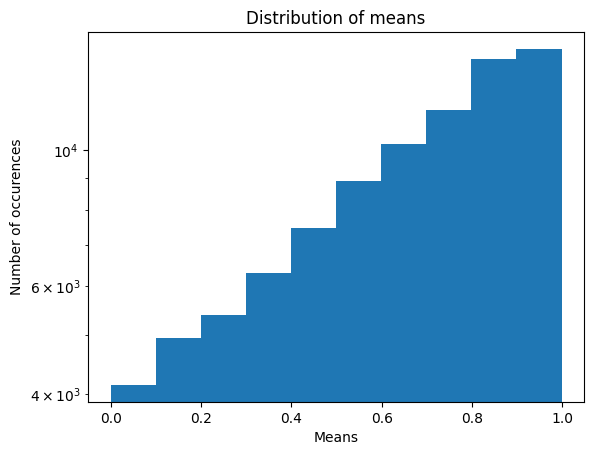

In [ ]:
# prompt: create a bar charts to visualize the density of values

plt.hist(means, bins=10, log=True)
plt.xlabel("Means")
plt.ylabel("Number of occurences")
plt.title("Distribution of means")
plt.show()


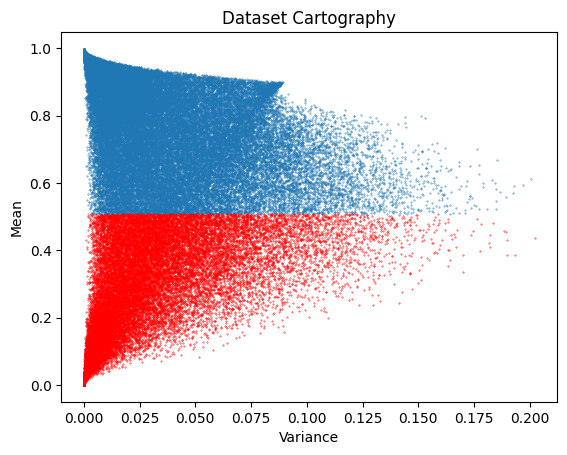

In [ ]:
# prompt: Create a heatmap of the pairs within the vm array

plt.scatter(variance[not_filter], means[not_filter], s=.1)
plt.scatter(variance[filter], means[filter], s=.1, color="red")
plt.xlabel("Variance")
plt.ylabel("Mean")
plt.title("Dataset Cartography")

plt.show()


In [ ]:
filter_list = list(filter)
filter_list = [int(i) for i in filter_list]
print(filter_list)

f = open('../gdrive/MyDrive/NLP_Final/hard_filter.json', encoding="utf-8", mode="w")
f.write(json.dumps(filter_list))
f.close()

[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 



```
# This is formatted as code
```

# Training Subset Models

In [ ]:
!ls ../gdrive/MyDrive/NLP_Final/default/training_data.hf

data-00000-of-00001.arrow  dataset_info.json  state.json


In [ ]:
!python3 run.py --do_train --task qa --dataset ../gdrive/MyDrive/NLP_Final/default/training_data.hf  --output_dir ../gdrive/MyDrive/NLP_Final/ambiguous/ --per_device_train_batch_size 64 --num_train_epochs 10 --filter_training_data ../gdrive/MyDrive/NLP_Final/filter.json

2023-11-27 05:13:42.311264: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 05:13:42.311323: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 05:13:42.311353: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 05:13:43.550519: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
dataset size 87714
Filtering training data
Filter: 100% 87714/87714 [00:52<00:00, 1660.80 examples/s]
Filtered data set size: 29823
Some weights of ElectraForQuestionAnswering were not initialized from the model checkpoint at google/elect

In [ ]:
!python3 run.py --do_train --task qa --dataset ../gdrive/MyDrive/NLP_Final/default/training_data.hf  --output_dir ../gdrive/MyDrive/NLP_Final/random/ --per_device_train_batch_size 64 --num_train_epochs 10 --sample_training_data True

2023-11-27 05:45:29.587032: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 05:45:29.587095: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 05:45:29.587134: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 05:45:30.851375: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
dataset size 87714
Sampling training data randomly: 87714
Filter: 100% 87714/87714 [00:50<00:00, 1727.53 examples/s]
Sampled training data randomly: 29238
Some weights of ElectraForQuestionAnswering were not initialized from the model che

In [ ]:
!python3 run.py --do_train --task qa --dataset ../gdrive/MyDrive/NLP_Final/default/training_data.hf  --output_dir ../gdrive/MyDrive/NLP_Final/easy/ --per_device_train_batch_size 64 --num_train_epochs 10 --filter_training_data ../gdrive/MyDrive/NLP_Final/easy_filter.json

2023-11-28 04:02:23.214746: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-28 04:02:23.214791: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-28 04:02:23.214839: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-28 04:02:24.406809: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
dataset size 87714
Filtering training data
Filter: 100% 87714/87714 [00:50<00:00, 1742.61 examples/s]
Filtered data set size: 29823
config.json: 100% 665/665 [00:00<00:00, 3.85MB/s]
pytorch_model.bin: 100% 54.2M/54.2M [00:00<00:00, 127MB/

In [ ]:
!python3 run.py --do_train --task qa --dataset ../gdrive/MyDrive/NLP_Final/default/training_data.hf  --output_dir ../gdrive/MyDrive/NLP_Final/hard/ --per_device_train_batch_size 64 --num_train_epochs 10 --filter_training_data ../gdrive/MyDrive/NLP_Final/hard_filter.json

2023-11-28 04:33:55.205962: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-28 04:33:55.206015: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-28 04:33:55.206043: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-28 04:33:56.383202: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
dataset size 87714
Filtering training data
Filter: 100% 87714/87714 [00:47<00:00, 1828.46 examples/s]
Filtered data set size: 28946
Some weights of ElectraForQuestionAnswering were not initialized from the model checkpoint at google/elect

# Eval Models

In [ ]:
!python3 run.py --do_eval --task qa --dataset squad --output_dir ../gdrive/MyDrive/NLP_Final/default --per_device_train_batch_size 64 --model ../gdrive/MyDrive/NLP_Final/default

2023-11-27 06:16:45.219263: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 06:16:45.219322: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 06:16:45.219352: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 06:16:46.550568: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Preprocessing data... (this takes a little bit, should only happen once per dataset)
Map (num_proc=2): 100% 10570/10570 [00:06<00:00, 1723.58 examples/s]
/content/fp-dataset-artifacts/run.py:167: FutureWarning: load_metric is deprecated a

In [ ]:
!python3 run.py --do_eval --task qa --dataset squad --output_dir ../gdrive/MyDrive/NLP_Final/random --per_device_train_batch_size 64 --model ../gdrive/MyDrive/NLP_Final/random

2023-11-27 06:18:16.142937: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 06:18:16.142995: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 06:18:16.143022: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 06:18:17.485825: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Preprocessing data... (this takes a little bit, should only happen once per dataset)
Map (num_proc=2): 100% 10570/10570 [00:05<00:00, 1784.27 examples/s]
/content/fp-dataset-artifacts/run.py:167: FutureWarning: load_metric is deprecated a

In [ ]:
!python3 run.py --do_eval --task qa --dataset squad --output_dir ../gdrive/MyDrive/NLP_Final/ambiguous --per_device_train_batch_size 64 --model ../gdrive/MyDrive/NLP_Final/ambiguous

2023-11-27 06:19:46.933337: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 06:19:46.933388: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 06:19:46.933416: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 06:19:48.206378: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Preprocessing data... (this takes a little bit, should only happen once per dataset)
Map (num_proc=2): 100% 10570/10570 [00:05<00:00, 1785.57 examples/s]
/content/fp-dataset-artifacts/run.py:167: FutureWarning: load_metric is deprecated a

In [ ]:
!python3 run.py --do_eval --task qa --dataset squad --output_dir ../gdrive/MyDrive/NLP_Final/easy --per_device_train_batch_size 64 --model ../gdrive/MyDrive/NLP_Final/easy

2023-11-28 05:04:13.568355: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-28 05:04:13.568407: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-28 05:04:13.568435: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-28 05:04:14.723688: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Extracting data files: 100% 2/2 [00:00<00:00, 2208.69it/s]
Generating train split: 100% 87599/87599 [00:07<00:00, 12013.37 examples/s]
Generating validation split: 100% 10570/10570 [00:01<00:00, 9421.42 examples/s]
Preprocessing data... (

In [ ]:
!python3 run.py --do_eval --task qa --dataset squad --output_dir ../gdrive/MyDrive/NLP_Final/hard --per_device_train_batch_size 64 --model ../gdrive/MyDrive/NLP_Final/hard

2023-11-28 05:05:47.083427: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-28 05:05:47.083475: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-28 05:05:47.083502: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-28 05:05:48.218548: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Preprocessing data... (this takes a little bit, should only happen once per dataset)
Map (num_proc=2): 100% 10570/10570 [00:05<00:00, 1954.26 examples/s]
/content/fp-dataset-artifacts/run.py:167: FutureWarning: load_metric is deprecated a

# Training Dataset Analysis

In [1]:
import datasets

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
squad_train = datasets.load_from_disk("./output/training_data.hf")


In [4]:
print(squad_train.column_names)

['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions', 'titles', 'row_idx']


In [5]:
row_to_title_id = []
titles = {}
for i in range(len(squad_train)):
    t = squad_train[i]["titles"]
    if t not in titles:
        titles[t] = len(titles)
    row_to_title_id.append(titles[t])

print(f"Unique titles: {len(titles)} for {len(row_to_title_id)}")

Unique titles: 442 for 87714


In [6]:
print(titles)

{'University_of_Notre_Dame': 0, 'Beyoncé': 1, 'Montana': 2, 'Genocide': 3, 'Antibiotics': 4, 'Frédéric_Chopin': 5, 'Sino-Tibetan_relations_during_the_Ming_dynasty': 6, 'IPod': 7, 'The_Legend_of_Zelda:_Twilight_Princess': 8, 'Spectre_(2015_film)': 9, '2008_Sichuan_earthquake': 10, 'New_York_City': 11, 'To_Kill_a_Mockingbird': 12, 'Solar_energy': 13, 'Tajikistan': 14, 'Anthropology': 15, 'Portugal': 16, 'Kanye_West': 17, 'Buddhism': 18, 'American_Idol': 19, 'Dog': 20, '2008_Summer_Olympics_torch_relay': 21, 'Alfred_North_Whitehead': 22, 'Financial_crisis_of_2007%E2%80%9308': 23, 'Saint_Barth%C3%A9lemy': 24, 'Genome': 25, 'Comprehensive_school': 26, 'Republic_of_the_Congo': 27, 'Prime_minister': 28, 'Institute_of_technology': 29, 'Wayback_Machine': 30, 'Dutch_Republic': 31, 'Symbiosis': 32, 'Canadian_Armed_Forces': 33, 'Cardinal_(Catholicism)': 34, 'Iranian_languages': 35, 'Lighting': 36, 'Separation_of_powers_under_the_United_States_Constitution': 37, 'Architecture': 38, 'Human_Developme

In [7]:
from collections import defaultdict

num_title_instances = defaultdict(lambda: 0)

for t in squad_train["titles"]:
    num_title_instances[t] += 1

print(num_title_instances)


defaultdict(<function <lambda> at 0x145ca42c0>, {'University_of_Notre_Dame': 269, 'Beyoncé': 758, 'Montana': 150, 'Genocide': 137, 'Antibiotics': 169, 'Frédéric_Chopin': 697, 'Sino-Tibetan_relations_during_the_Ming_dynasty': 296, 'IPod': 327, 'The_Legend_of_Zelda:_Twilight_Princess': 214, 'Spectre_(2015_film)': 278, '2008_Sichuan_earthquake': 521, 'New_York_City': 817, 'To_Kill_a_Mockingbird': 228, 'Solar_energy': 250, 'Tajikistan': 154, 'Anthropology': 222, 'Portugal': 435, 'Kanye_West': 428, 'Buddhism': 610, 'American_Idol': 802, 'Dog': 392, '2008_Summer_Olympics_torch_relay': 500, 'Alfred_North_Whitehead': 317, 'Financial_crisis_of_2007%E2%80%9308': 390, 'Saint_Barth%C3%A9lemy': 120, 'Genome': 76, 'Comprehensive_school': 73, 'Republic_of_the_Congo': 145, 'Prime_minister': 100, 'Institute_of_technology': 154, 'Wayback_Machine': 79, 'Dutch_Republic': 68, 'Symbiosis': 65, 'Canadian_Armed_Forces': 179, 'Cardinal_(Catholicism)': 117, 'Iranian_languages': 65, 'Lighting': 141, 'Separation_

In [15]:
import json
with open("ambiguous_filter.json") as f:
    ambiguous_filter = json.loads(f.read())

In [17]:
num_title_instances_for_filter = defaultdict(lambda: 0)

for i, t in enumerate(squad_train["titles"]):
    if ambiguous_filter[i] == 0:
        continue
    num_title_instances_for_filter[t] += 1



In [23]:
fraction_of_questions_for_context_included = {t: count / num_title_instances[t] for t, count in num_title_instances_for_filter.items()}

In [24]:
print(fraction_of_questions_for_context_included)

{'University_of_Notre_Dame': 0.7881040892193308, 'Beyoncé': 0.762532981530343, 'Montana': 0.72, 'Genocide': 0.7737226277372263, 'Antibiotics': 0.757396449704142, 'Frédéric_Chopin': 0.763271162123386, 'Sino-Tibetan_relations_during_the_Ming_dynasty': 0.7466216216216216, 'IPod': 0.7798165137614679, 'The_Legend_of_Zelda:_Twilight_Princess': 0.7570093457943925, 'Spectre_(2015_film)': 0.7661870503597122, '2008_Sichuan_earthquake': 0.7523992322456814, 'New_York_City': 0.7723378212974297, 'To_Kill_a_Mockingbird': 0.6798245614035088, 'Solar_energy': 0.732, 'Tajikistan': 0.6948051948051948, 'Anthropology': 0.7702702702702703, 'Portugal': 0.6827586206896552, 'Kanye_West': 0.6869158878504673, 'Buddhism': 0.6885245901639344, 'American_Idol': 0.6770573566084788, 'Dog': 0.6683673469387755, '2008_Summer_Olympics_torch_relay': 0.622, 'Alfred_North_Whitehead': 0.5930599369085173, 'Financial_crisis_of_2007%E2%80%9308': 0.6025641025641025, 'Saint_Barth%C3%A9lemy': 0.6166666666666667, 'Genome': 0.61842105

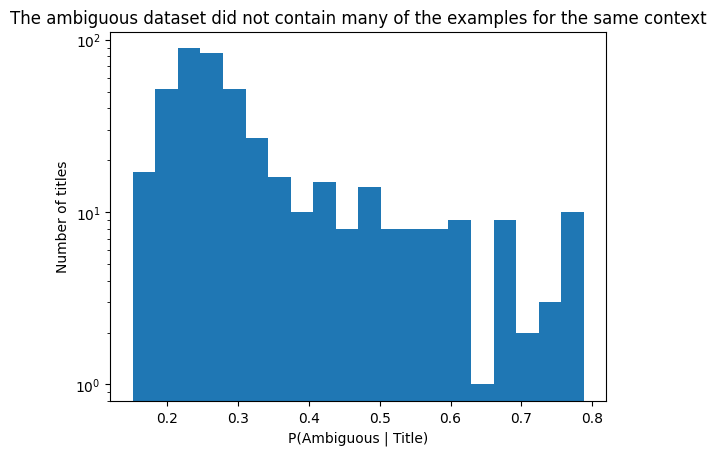

In [40]:
from matplotlib import pyplot as plt
# prompt: create a bar charts to visualize the density of values

plt.hist(list(fraction_of_questions_for_context_included.values()), bins=20, log=True)
plt.xlabel("P(Ambiguous | Title)")
plt.ylabel("Number of titles")
plt.title("The ambiguous dataset did not contain many of the examples for the same context")
plt.show()


In [32]:
# Rank the titles by their ambiguity

variance_scores_by_title = defaultdict(lambda: [])
prob_of_correct_by_title = defaultdict(lambda: [])
for i, (m, v) in enumerate(zip(means, variance)):
    t = squad_train[i]["titles"]
    variance_scores_by_title[t].append(v)
    prob_of_correct_by_title[t].append(m)


average_variance = {title: sum(vs)/len(vs) for title, vs in variance_scores_by_title.items() }
average_prob = {title: sum(ms)/len(ms) for title, ms in prob_of_correct_by_title.items() }

print(average_variance)
print(average_prob)


{'University_of_Notre_Dame': 0.06760423739265942, 'Beyoncé': 0.06459645520258676, 'Montana': 0.059119435356437544, 'Genocide': 0.06382649389857344, 'Antibiotics': 0.06472747309558469, 'Frédéric_Chopin': 0.06369283779717323, 'Sino-Tibetan_relations_during_the_Ming_dynasty': 0.06181483641397328, 'IPod': 0.06367843761619502, 'The_Legend_of_Zelda:_Twilight_Princess': 0.05960004146200405, 'Spectre_(2015_film)': 0.06254517680761255, '2008_Sichuan_earthquake': 0.061604796739207844, 'New_York_City': 0.05940138929392333, 'To_Kill_a_Mockingbird': 0.056018303584619525, 'Solar_energy': 0.05710952642025429, 'Tajikistan': 0.05494709431301167, 'Anthropology': 0.05768303891451259, 'Portugal': 0.053622769807005526, 'Kanye_West': 0.05335377985455908, 'Buddhism': 0.05215631289647006, 'American_Idol': 0.05069581520048216, 'Dog': 0.05225394977264738, '2008_Summer_Olympics_torch_relay': 0.0497851012189919, 'Alfred_North_Whitehead': 0.04601916947360715, 'Financial_crisis_of_2007%E2%80%9308': 0.04790262535369

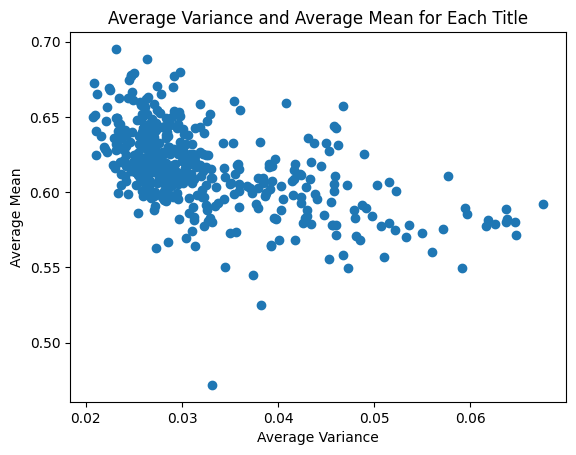

In [38]:
xs = []
ys = []

for k in average_variance.keys():
    xs.append(average_variance[k])
    ys.append(average_prob[k])



plt.scatter(xs, ys)
plt.xlabel("Average Variance")
plt.ylabel("Average Mean")
plt.title("Average Variance and Average Mean for Each Title")

plt.show()


In [43]:
title_and_avg_variance = list(average_variance.items())
title_and_avg_variance.sort(key = lambda x: x[1], reverse=True)

# Sorted from most ambiguous to least.
print(title_and_avg_variance)




[('University_of_Notre_Dame', 0.06760423739265942), ('Antibiotics', 0.06472747309558469), ('Beyoncé', 0.06459645520258676), ('Genocide', 0.06382649389857344), ('Frédéric_Chopin', 0.06369283779717323), ('IPod', 0.06367843761619502), ('Spectre_(2015_film)', 0.06254517680761255), ('Sino-Tibetan_relations_during_the_Ming_dynasty', 0.06181483641397328), ('2008_Sichuan_earthquake', 0.061604796739207844), ('The_Legend_of_Zelda:_Twilight_Princess', 0.05960004146200405), ('New_York_City', 0.05940138929392333), ('Montana', 0.059119435356437544), ('Anthropology', 0.05768303891451259), ('Solar_energy', 0.05710952642025429), ('To_Kill_a_Mockingbird', 0.056018303584619525), ('Tajikistan', 0.05494709431301167), ('Portugal', 0.053622769807005526), ('Kanye_West', 0.05335377985455908), ('Dog', 0.05225394977264738), ('Buddhism', 0.05215631289647006), ('Saint_Barth%C3%A9lemy', 0.051492615922450566), ('Republic_of_the_Congo', 0.05148219449278205), ('Genome', 0.050993325845647565), ('American_Idol', 0.05069

In [44]:
threshold = len(squad_train) / 3

included_titles = set([])
count = 0 



for title, _ in title_and_avg_variance:
    count += num_title_instances[title]
    included_titles.add(title)
    if count > threshold:
        break



print("Fraction of included titles:", len(included_titles)/len(num_title_instances))


Fraction of included titles: 0.31447963800904977


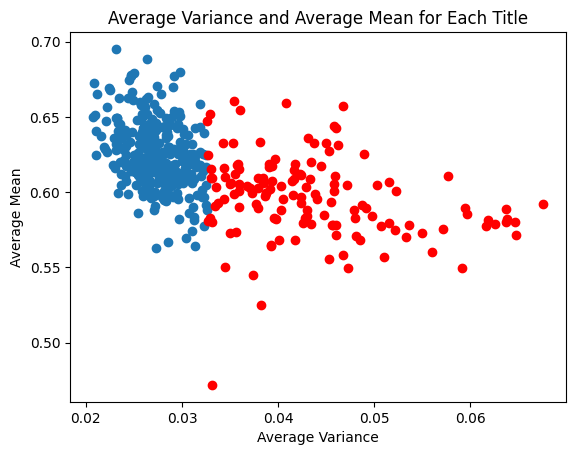

In [49]:
xs = []
ys = []

for k in average_variance.keys():
    if k in included_titles:
        continue
    xs.append(average_variance[k])
    ys.append(average_prob[k])
plt.scatter(xs, ys)

xs = []
ys = []
for k in average_variance.keys():
    if k not in included_titles:
        continue
    xs.append(average_variance[k])
    ys.append(average_prob[k])
plt.scatter(xs, ys, color="red")

plt.xlabel("Average Variance")
plt.ylabel("Average Mean")
plt.title("Average Variance and Average Mean for Each Title")

plt.show()


In [46]:
greedy_filter = np.zeros(len(squad_train))

for i, title in enumerate(squad_train["titles"]):
    if title not in included_titles:
        continue
    greedy_filter[i] = 1

In [47]:

filter_list = [int(i) for i in greedy_filter]
print(filter_list)

f = open('greedy_filter.json', encoding="utf-8", mode="w")
f.write(json.dumps(filter_list))
f.close()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 